In [81]:
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [82]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [83]:
enc = OrdinalEncoder()

# y*.shape = (num_sample, 1)
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1))
y_test_enc = enc.transform(y_test.reshape(-1, 1))
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1))
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025, 1)


In [84]:
# 不需要指定num_class参数
model = XGBClassifier(
    booster='gbtree',
    n_jobs=-1,  # 对应nthread
    max_depth=6,
    min_child_weight=2,
    gamma=0,
    learning_rate=0.3,
    subsample=1,
    colsample_bytree=0.9,
    colsample_bylevel=0.9,
    reg_alpha=0,
    reg_lambda=0,
    objective='multi:softprob',
    verbosity=0,
    use_label_encoder=False)

In [85]:
model.fit(X_train, y_train_enc,
          eval_set=[(X_train, y_train_enc), (X_va, y_va_enc)],  # 对应evals
          sample_weight=1 / (y_train_enc + 1),  # 对应DMatrix(weight)
          verbose=50,  # 对应evals
          eval_metric='mlogloss',  # 对应eval_metric+feval
          early_stopping_rounds=100,
          )

[0]	validation_0-mlogloss:1.44102	validation_1-mlogloss:1.48805
[50]	validation_0-mlogloss:0.10676	validation_1-mlogloss:0.44752
[99]	validation_0-mlogloss:0.05069	validation_1-mlogloss:0.45081


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [86]:
# 预测结果(num_sample, )
model.predict(X_test)

array([1, 0, 3, 6, 0, 4, 0, 1, 4, 1, 1, 4, 1, 1, 0, 1, 1, 4, 4, 1, 5, 0,
       1, 0, 3, 5, 1, 1, 2, 0, 4, 5, 4, 4, 1, 6, 5, 0, 5, 0, 1, 4, 0, 1,
       1, 1, 4, 4, 1, 4, 1, 0, 5, 4, 5, 4, 1, 1, 1, 3, 1, 4, 0, 0, 0, 5,
       1, 1, 2, 0, 0, 1, 0, 0, 1, 4, 2, 0, 4, 4, 4, 1, 1, 4, 4, 1, 1, 0,
       4, 3, 6, 1, 1, 1, 1, 4, 0, 4, 4, 1, 0, 2, 0, 1, 1, 1, 3, 4, 1, 0,
       1, 4, 1, 1, 0, 1, 0, 0, 4, 5, 5, 2, 4, 4, 2, 1, 2, 2, 4, 1, 1, 1,
       0, 1, 5, 2, 4, 1, 4, 4, 1, 4, 6, 1, 6, 4, 0, 4, 1, 0, 6, 4, 0, 0,
       4, 0, 1, 4, 2, 4, 4, 4, 2, 5, 2, 1, 1, 1, 5, 4, 1, 2, 1, 0, 6, 4,
       0, 4, 5, 4, 4, 6, 1, 1, 0, 0, 4, 1, 5, 1, 1, 1, 1, 5, 1, 6, 2, 0,
       1, 4, 1, 4, 3, 4, 6, 1, 6, 4, 6, 0, 4, 6, 1, 1, 1, 0, 0, 1, 4, 0,
       4, 4, 4, 2, 2, 4, 0, 4, 5, 4, 1, 4, 1, 1, 2, 4, 4, 0, 1, 1, 4, 0,
       1, 6, 5, 0, 4, 6, 0, 1, 4, 1, 0, 0, 0, 2, 3, 0, 4, 4, 4, 1, 2, 1,
       0, 4, 6, 2, 4, 2, 1, 4, 1, 1, 4, 1, 1, 2, 3, 1, 1, 4, 0, 4, 3, 4,
       1, 0, 0, 1, 1, 1, 6, 1, 6, 2, 1, 3, 0, 4], d

In [87]:
# 预测结果的概率矩阵
model.predict_proba(X_test)

array([[1.5485837e-01, 8.4326839e-01, 4.0643496e-04, ..., 3.2895341e-04,
        2.5566967e-04, 5.7940703e-04],
       [9.6997720e-01, 2.3831388e-02, 2.2954660e-04, ..., 6.0991518e-04,
        2.0896748e-04, 4.7853892e-03],
       [2.6889320e-04, 1.1112417e-04, 1.9272486e-03, ..., 1.6950780e-04,
        4.8757877e-04, 4.1022377e-05],
       ...,
       [3.9464107e-04, 3.4335273e-04, 3.4150409e-03, ..., 2.3396811e-04,
        6.8295636e-04, 6.8536559e-05],
       [6.5019190e-01, 3.4694546e-01, 2.3218771e-04, ..., 9.2588953e-04,
        7.8149722e-04, 5.8069773e-04],
       [2.8049748e-04, 7.5583993e-03, 7.3364085e-05, ..., 9.9193478e-01,
        7.1924929e-05, 4.7571037e-05]], dtype=float32)

In [88]:
# 准确率
model.score(X_test, y_test_enc)

0.83

In [89]:
model.evals_result_  # 对应evals_result

{'validation_0': OrderedDict([('mlogloss',
               [1.441021,
                1.188432,
                0.990089,
                0.851591,
                0.742017,
                0.655556,
                0.587178,
                0.534443,
                0.489139,
                0.45198,
                0.41807,
                0.387448,
                0.36218,
                0.339619,
                0.324778,
                0.312455,
                0.29705,
                0.285669,
                0.274866,
                0.262629,
                0.250535,
                0.240109,
                0.228949,
                0.21793,
                0.211416,
                0.202331,
                0.194066,
                0.187737,
                0.184024,
                0.177735,
                0.172466,
                0.167527,
                0.161909,
                0.1582,
                0.153004,
                0.148378,
                0.145284,
  

In [90]:
# 特征相对重要性
model.feature_importances_

array([0.02817142, 0.00550472, 0.00586159, 0.00819252, 0.0058322 ,
       0.01341341, 0.00576196, 0.00722859, 0.00803584, 0.00759922,
       0.07352884, 0.        , 0.01107299, 0.1217304 , 0.00550132,
       0.01132551, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00543906, 0.        ,
       0.01784425, 0.03680569, 0.        , 0.        , 0.00953699,
       0.3301692 , 0.08696369, 0.        , 0.00831059, 0.        ,
       0.00603793, 0.02576962, 0.00296501, 0.        , 0.        ,
       0.        , 0.        , 0.00557511, 0.02691907, 0.        ,
       0.02265752, 0.00389723, 0.        , 0.        , 0.        ,
       0.        , 0.05377903, 0.03856948, 0.        ], dtype=float32)

In [91]:
# 保存训练好的模型
model.save_model("xgb1.model")

In [92]:
# 加载训练好的模型
bst = XGBClassifier()
bst.load_model('xgb1.model')
bst.score(X_test, y_test_enc)

0.83

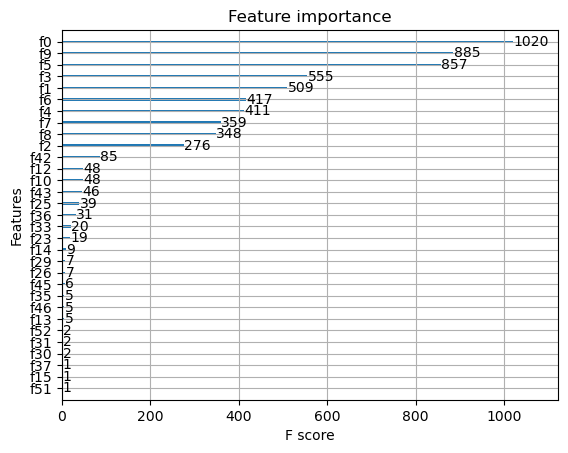

In [93]:
import matplotlib.pyplot as plt
import xgboost as xgb

# 绘制特征的相对重要性
xgb.plot_importance(model)
plt.show()

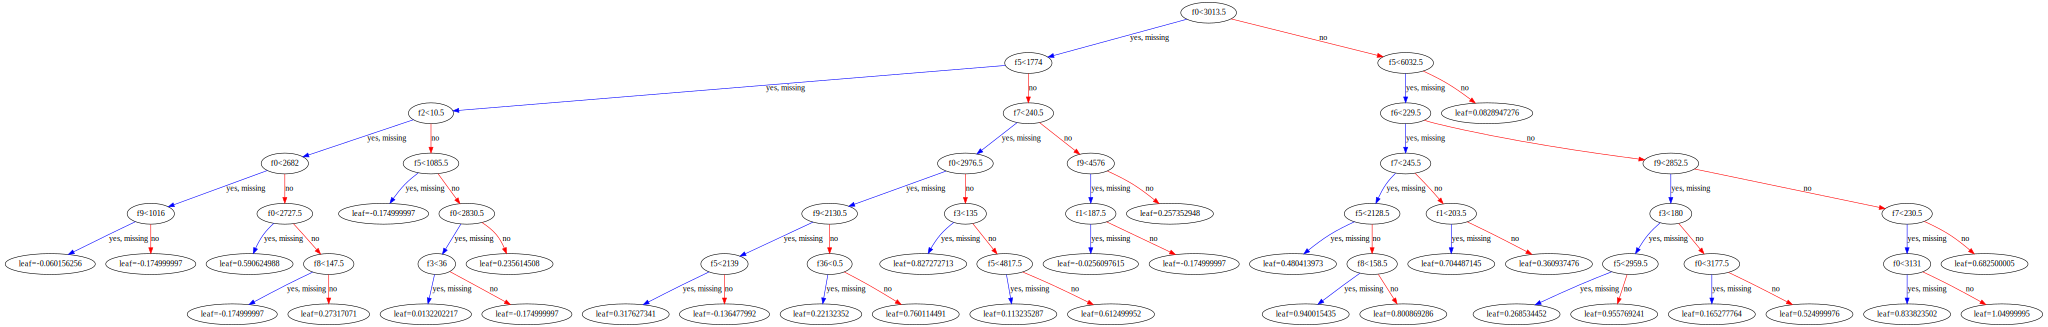

In [94]:
# 可视化lgb分割过程
xgb.to_graphviz(model)